# Notes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from sympy.physics.units import magnetic_density

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

In [ ]:
df = pd.read_parquet("./data/us_births.parquet")

### Annual births

Sum by year:

- `p_ds_lb_nt` - Estimated Down Syndrome live births without terminations (probabilities based on maternal age, sum is expected count)
- `p_ds_lb_wt` - Estimated Down Syndrome live births with terminations (probabilities based on annual estimates from surveillance data, sum is expected count)
- `down_ind` - Recorded Down Syndrome live births (1 = recorded, sum is count)

In [114]:
births_year_df = df[[vars.YEAR, vars.P_DS_LB_NT, vars.P_DS_LB_WT, vars.DOWN_IND]].groupby(vars.YEAR).sum()
births_year_df

,p_ds_lb_nt,p_ds_lb_wt,down_ind
year,,,
1989,5435.804076,4199.429334,1954
1990,5716.629219,4391.877435,1983
1991,5794.837984,4432.223334,1791
1992,5888.002906,4407.190524,1816
1993,5957.920280,4376.943639,1763
1994,6063.337957,4360.531350,1706
1995,6140.807701,4375.276452,1640
1996,6279.330012,4280.466526,1677
1997,6396.586350,4365.985796,1663


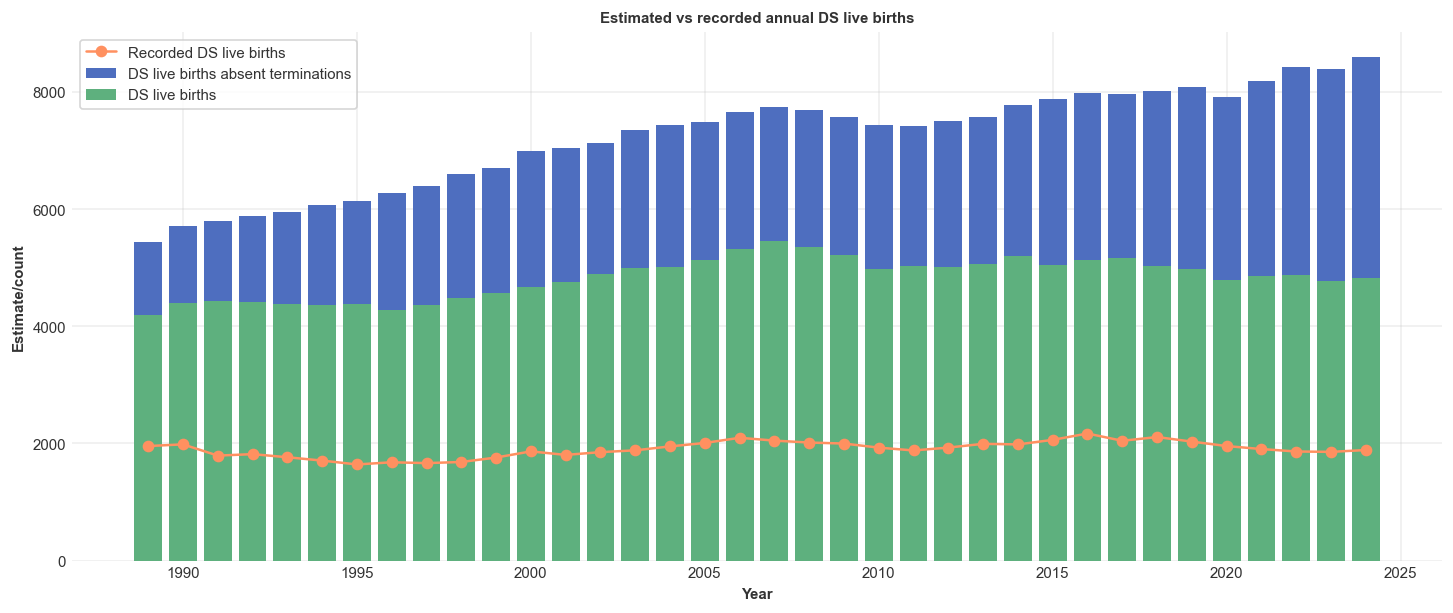

In [115]:
plt.figure(figsize=(12, 5))
plt.title("Estimated vs recorded annual DS live births")
plt.xlabel("Year")
plt.ylabel("Estimate/count")
plt.bar(births_year_df.index, births_year_df[vars.P_DS_LB_NT], label="DS live births absent terminations")
plt.bar(births_year_df.index, births_year_df[vars.P_DS_LB_WT], label="DS live births")
plt.plot(births_year_df.index, births_year_df[vars.DOWN_IND], marker='o', color="#ff9060", label='Recorded DS live births')
plt.legend()

In [142]:
age_ds_df = df[[vars.MAGE_C, vars.P_DS_LB_NT, vars.P_DS_LB_WT]].groupby(vars.MAGE_C).describe()
age_ds_df

p_ds_lb_nt                                                        \
            count      mean           std       min       25%       50%   
mage_c                                                                    
10          135.0  0.000656  2.176480e-19  0.000656  0.000656  0.000656   
11          430.0  0.000657  0.000000e+00  0.000657  0.000657  0.000657   
12         5612.0  0.000657  1.084299e-19  0.000657  0.000657  0.000657   
13        36816.0  0.000658  1.084217e-19  0.000658  0.000658  0.000658   
14       186378.0  0.000659  1.084205e-19  0.000659  0.000659  0.000659   
15       597678.0  0.000660  0.000000e+00  0.000660  0.000660  0.000660   
16      1333835.0  0.000662  2.168405e-19  0.000662  0.000662  0.000662   
17      2338979.0  0.000664  2.168405e-19  0.000664  0.000664  0.000664   
18      3653735.0  0.000667  1.084202e-19  0.000667  0.000667  0.000667   
19      5132827.0  0.000672  2.168405e-19  0.000672  0.000672  0.000672   
20      5912309.0  0.000677  0.000000e+00  0.000677  0.000677  0.000677   
21      6323443.0  0.000684  2.168405e-19  0.000684  0.000684  0.000684   
22      6740707.0  0.000694  2.168405e-19  0.000694  0.000694  0.000694   
23      6974795.0  0.000706  2.168405e-19  0.000706  0.000706  0.000706   
24      7256499.0  0.000723  1.084202e-19  0.000723  0.000723  0.000723   
25      7584771.0  0.000746  1.084202e-19  0.000746  0.000746  0.000746   
26      7868116.0  0.000777  1.084202e-19  0.000777  0.000777  0.000777   
27      8111118.0  0.000819  1.084202e-19  0.000819  0.000819  0.000819   
28      8277083.0  0.000877  0.000000e+00  0.000877  0.000877  0.000877   
29      8329556.0  0.000956  5.421011e-19  0.000956  0.000956  0.000956   
30      8151583.0  0.001065  4.336809e-19  0.001065  0.001065  0.001065   
31      7801981.0  0.001219  2.168404e-19  0.001219  0.001219  0.001219   
32      7215210.0  0.001436  6.505213e-19  0.001436  0.001436  0.001436   
33      6509331.0  0.001747  2.168405e-19  0.001747  0.001747  0.001747   
34      5790455.0  0.002192  4.336809e-19  0.002192  0.002192  0.002192   
35      5006197.0  0.002830  4.336809e-19  0.002830  0.002830  0.002830   
36      4151358.0  0.003738  4.336809e-19  0.003738  0.003738  0.003738   
37      3308685.0  0.005003  0.000000e+00  0.005003  0.005003  0.005003   
38      2573892.0  0.006711  2.602086e-18  0.006711  0.006711  0.006711   
39      1959591.0  0.008920  0.000000e+00  0.008920  0.008920  0.008920   
40      1403350.0  0.011626  3.469448e-18  0.011626  0.011626  0.011626   
41       945624.0  0.014752  1.734724e-18  0.014752  0.014752  0.014752   
42       599937.0  0.018147  3.469450e-18  0.018147  0.018147  0.018147   
43       355291.0  0.021621  6.938904e-18  0.021621  0.021621  0.021621   
44       197084.0  0.024986  6.938912e-18  0.024986  0.024986  0.024986   
45       104167.0  0.028089  3.469464e-18  0.028089  0.028089  0.028089   
46        53757.0  0.030835  3.469479e-18  0.030835  0.030835  0.030835   
47        28668.0  0.033183  0.000000e+00  0.033183  0.033183  0.033183   
48        16025.0  0.035136  0.000000e+00  0.035136  0.035136  0.035136   
49        10242.0  0.036725  0.000000e+00  0.036725  0.036725  0.036725   
50        17146.0  0.037995  0.000000e+00  0.037995  0.037995  0.037995   
51          409.0  0.038996  6.947392e-18  0.038996  0.038996  0.038996   
52          220.0  0.039778  6.954718e-18  0.039778  0.039778  0.039778   
53          161.0  0.040383  6.960544e-18  0.040383  0.040383  0.040383   
54          103.0  0.040848  6.972825e-18  0.040848  0.040848  0.040848   

                           p_ds_lb_wt                                          \
             75%       max      count      mean       std       min       25%   
mage_c                                                                          
10      0.000656  0.000656      135.0  0.001067  0.000043  0.001038  0.001038   
11      0.000657  0.000657      430.0  0.001100  0.000049  0.001038  0.001055   
1

In [143]:
recorded_df = df[df[vars.DOWN_IND] == 1]

In [149]:
age_ds_recorded_df = recorded_df[[vars.MAGE_C, vars.P_DS_LB_NT, vars.P_DS_LB_WT]].groupby(vars.MAGE_C).describe()
age_ds_recorded_df

p_ds_lb_nt                                                        \
            count      mean           std       min       25%       50%   
mage_c                                                                    
12            2.0  0.000657  0.000000e+00  0.000657  0.000657  0.000657   
13            7.0  0.000658  0.000000e+00  0.000658  0.000658  0.000658   
14           39.0  0.000659  2.196751e-19  0.000659  0.000659  0.000659   
15          163.0  0.000660  1.087543e-19  0.000660  0.000660  0.000660   
16          364.0  0.000662  2.171389e-19  0.000662  0.000662  0.000662   
17          611.0  0.000664  2.170181e-19  0.000664  0.000664  0.000664   
18          948.0  0.000667  1.084774e-19  0.000667  0.000667  0.000667   
19         1389.0  0.000672  1.084593e-19  0.000672  0.000672  0.000672   
20         1586.0  0.000677  0.000000e+00  0.000677  0.000677  0.000677   
21         1682.0  0.000684  2.169049e-19  0.000684  0.000684  0.000684   
22         1742.0  0.000694  1.084514e-19  0.000694  0.000694  0.000694   
23         1827.0  0.000706  2.168998e-19  0.000706  0.000706  0.000706   
24         1849.0  0.000723  1.084495e-19  0.000723  0.000723  0.000723   
25         1922.0  0.000746  1.084484e-19  0.000746  0.000746  0.000746   
26         2020.0  0.000777  0.000000e+00  0.000777  0.000777  0.000777   
27         2234.0  0.000819  2.168890e-19  0.000819  0.000819  0.000819   
28         2327.0  0.000877  1.084435e-19  0.000877  0.000877  0.000877   
29         2588.0  0.000956  0.000000e+00  0.000956  0.000956  0.000956   
30         2588.0  0.001065  2.168823e-19  0.001065  0.001065  0.001065   
31         2764.0  0.001219  2.168797e-19  0.001219  0.001219  0.001219   
32         2944.0  0.001436  2.168773e-19  0.001436  0.001436  0.001436   
33         3091.0  0.001747  0.000000e+00  0.001747  0.001747  0.001747   
34         3274.0  0.002192  4.337471e-19  0.002192  0.002192  0.002192   
35         3416.0  0.002830  8.674887e-19  0.002830  0.002830  0.002830   
36         3544.0  0.003738  4.337421e-19  0.003738  0.003738  0.003738   
37         3651.0  0.005003  8.674805e-19  0.005003  0.005003  0.005003   
38         3629.0  0.006711  0.000000e+00  0.006711  0.006711  0.006711   
39         3575.0  0.008920  1.734966e-18  0.008920  0.008920  0.008920   
40         3326.0  0.011626  0.000000e+00  0.011626  0.011626  0.011626   
41         2912.0  0.014752  0.000000e+00  0.014752  0.014752  0.014752   
42         2348.0  0.018147  3.470186e-18  0.018147  0.018147  0.018147   
43         1746.0  0.021621  3.470441e-18  0.021621  0.021621  0.021621   
44         1182.0  0.024986  0.000000e+00  0.024986  0.024986  0.024986   
45          651.0  0.028089  3.472115e-18  0.028089  0.028089  0.028089   
46          333.0  0.030835  3.474668e-18  0.030835  0.030835  0.030835   
47          173.0  0.033183  0.000000e+00  0.033183  0.033183  0.033183   
48           42.0  0.035136  0.000000e+00  0.035136  0.035136  0.035136   
49           14.0  0.036725  0.000000e+00  0.036725  0.036725  0.036725   
50           10.0  0.037995  0.000000e+00  0.037995  0.037995  0.037995   
51            1.0  0.038996           NaN  0.038996  0.038996  0.038996   
53            1.0  0.040383           NaN  0.040383  0.040383  0.040383   

                           p_ds_lb_wt                                          \
             75%       max      count      mean       std       min       25%   
mage_c                                                                          
12      0.000657  0.000657        2.0  0.001158  0.000030  0.001136  0.001147   
13      0.000658  0.000658        7.0  0.001130  0.000093  0.001055  0.001066   
14      0.000659  0.000659       39.0  0.001142  0.000082  0.001038  0.001077   
15      0.000660  0.000660      163.0  0.001183  0.000090  0.001038  0.001099   
16      0.000662  0.000662      364.0  0.001172  0.000090  0.001038  0.001093   
17      0.000664  0.000664      611.0  0.001181  0.000091 

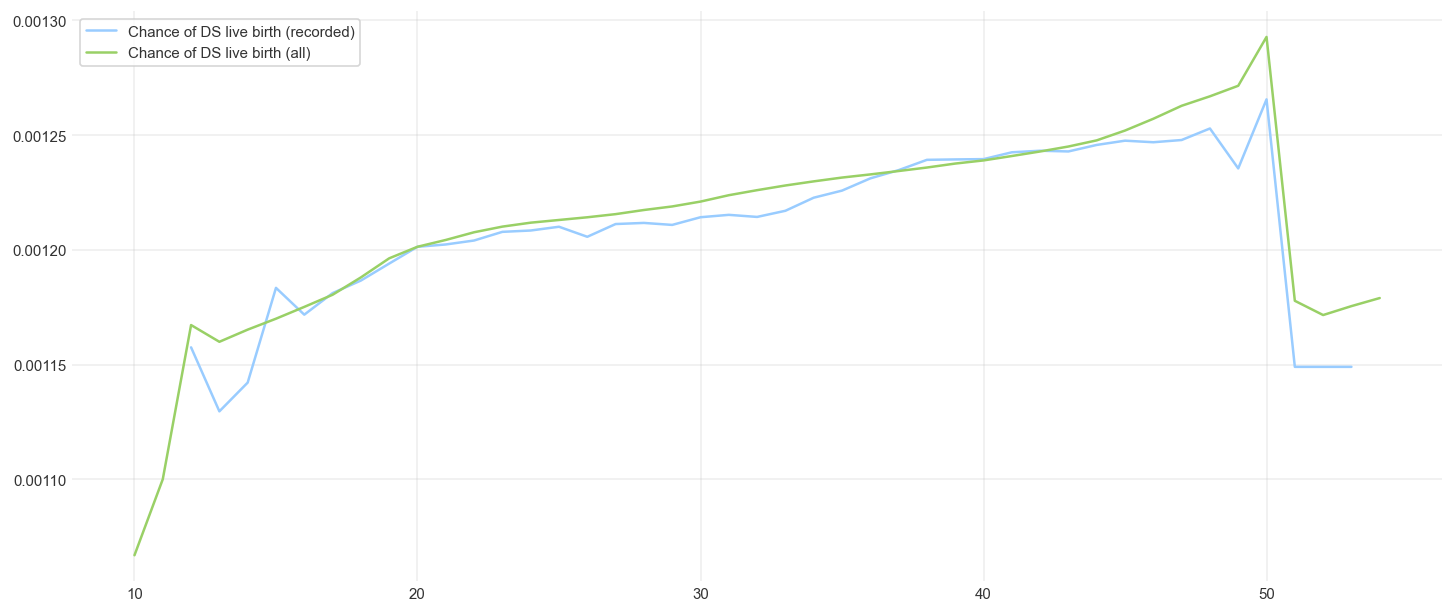

In [154]:
plt.figure(figsize=(12, 5))
plt.plot(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_WT, 'mean')], color="#99ccff", label="Chance of DS live birth (recorded)")
plt.plot(age_ds_df.index, age_ds_df[(vars.P_DS_LB_WT, 'mean')], color="#99d066", label="Chance of DS live birth (all)")
plt.legend()

<BarContainer object of 45 artists>

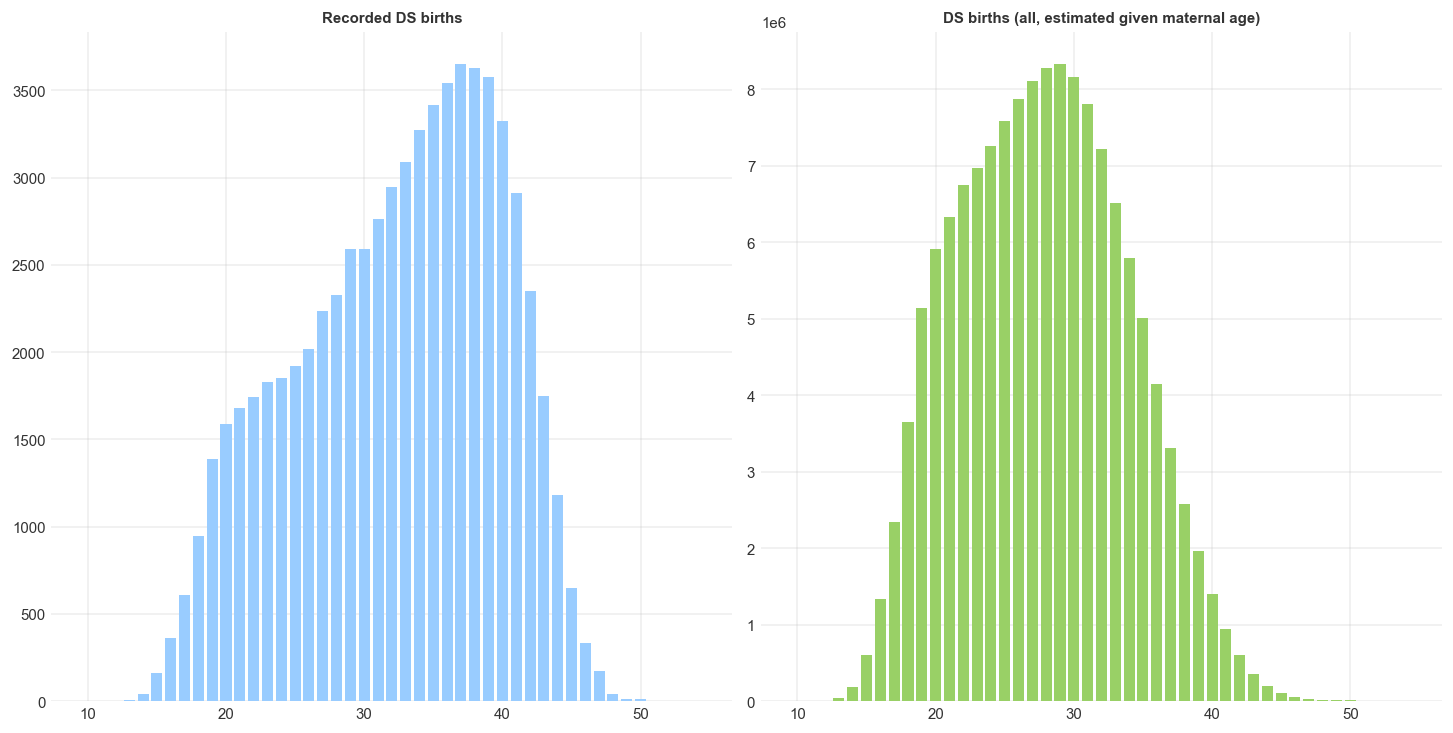

In [152]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6))

axs[0].set_title("Recorded DS births")
axs[0].bar(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_NT, 'count')], color="#99ccff")

axs[1].set_title("DS births (all, estimated given maternal age)")
axs[1].bar(age_ds_df.index, age_ds_df[(vars.P_DS_LB_NT, 'count')], color="#99d066")


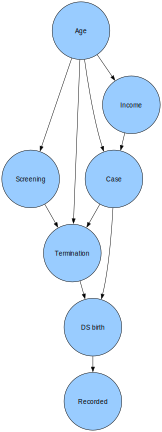

In [136]:
from graphviz import Digraph

dag = Digraph()

dag.attr(fontname="Helvetica")
dag.attr("node", fontname="Helvetica")
dag.attr("edge", fontname="Helvetica")

# set font sizes
dag.attr(size="8,6")
dag.attr("node", fontsize="14", style="filled", fillcolor="#99ccff")
dag.attr("edge", fontsize="12")

dag.attr(rankdir="TB", splines="spline")  # Top-to-bottom flow
dag.attr("node", shape="circle", fixedsize="true", width="1.75")

edges = [
    ('Age', 'Case'),
    ('Age', 'Screening'),
    ('Age', 'Termination'),
    ('Age', 'Income'),
    ('Income', 'Case'),
    ('Case', 'Termination'),
    ('Case', 'DS birth'),
    ('Screening', 'Termination'),
    ('Termination', 'DS birth'),
    ('DS birth', 'Recorded'),
]

for src, dst in edges:
    dag.edge(src, dst)

dag
